## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Conclusion](#conclusion)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [108]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [109]:
#read in data
df = pd.read_csv('ab_data.csv')
#inspect dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [110]:
df.user_id.count()

294478

c. The number of unique users in the dataset.

In [111]:
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [112]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [113]:
df.query('landing_page == "new_page" & group != "treatment"').user_id.count() + df.query('landing_page == "old_page" & group != "control"').user_id.count()

3893

f. Do any of the rows have missing values?

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


none of the rows have missing values!

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [115]:
#Drop rows where treatment is not with new_page
df.drop(df.query('landing_page == "new_page" & group != "treatment"').index, inplace=True)
#Drop rows where control is not with old_page
df.drop(df.query('landing_page == "old_page" & group != "control"').index, inplace=True)


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [117]:
# Double Check all of the correct rows were removed - this should be 0
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

0

In [118]:
df2 = df

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [119]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [120]:
sum(df2.user_id.duplicated())

1

In [121]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [122]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [123]:
df2.query('index == 2893') 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [124]:
df2.drop(df2.query('index == 2893').index, inplace=True)

In [125]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [126]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [127]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [128]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [129]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [130]:
df2.query('group == "treatment"').user_id.count() / df2.user_id.count()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Answer**
> Given that the treatment and control group had a p=0.1188 and p=0.12038 respectfully, I'd say there is evidence to investigate further. Being that the difference between the two is really small and concepts like change adversion and 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

>$H_{0}$ : $p_{old}$ >=  $p_{new}$

>$H_{1}$ : $p_{old}$ <  $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [131]:
pNew = df2.converted.mean()
pNew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [132]:
pOld = df2.converted.mean()
pOld

0.11959708724499628

c. What is $n_{new}$?

In [133]:
nNew = len(df2.query('group == "treatment"'))
nNew

145310

d. What is $n_{old}$?

In [134]:
nOld = len(df2.query('group == "control"'))
nOld

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [135]:
new_page_converted = np.random.choice([1, 0], size=nNew, p=[pNew, (1-pNew)]).mean()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [136]:
old_page_converted = np.random.choice([1, 0], size=nOld, p=[pOld, (1-pOld)]).mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [137]:
pDiff = new_page_converted - old_page_converted
pDiff

-0.00071061568154059951

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [138]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=nNew, p=[pNew, (1-pNew)]).mean()
    old_page_converted = np.random.choice([1, 0], size=nOld, p=[pOld, (1-pOld)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

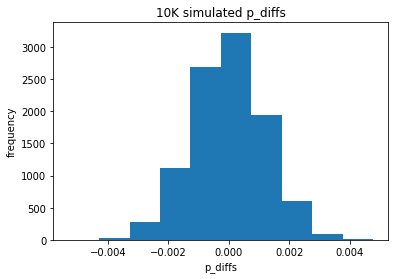

In [139]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('frequency')
plt.title('10K simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [140]:
act_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
act_diff

-0.0015782389853555567

In [141]:
(act_diff < p_diffs).mean()

0.90380000000000005

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

> For the first part we are computing the actual difference in probability between those that converted within the treatment group and those that converted within the control group. 

>> The negative value represents that there is a higher chance that those in the control group will convert at a higher rate. But the value is really small at -0.001578

> The second part compares this value with those of simulated sample differences of 10000.

>> This number represents the proportion of the simulated sample differences that are greater than the actual difference.

>> Since our null is P_Old >= P_New (difference is 0 or higher) and our alternative is P_Old < P_New (difference is below 0) this number represents the probability of observing our statistic if the null hypothesis is true.

>So it's the P-VALUE!

> Here, since the p-value is > 0.05 we fail to reject the null hypothesis.

>>New pages perform almost similarly! 


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [142]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [143]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score) 
print(p_value)

1.31092419842
0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [144]:
from scipy.stats import norm
print(norm.cdf(z_score))
print(norm.ppf(1-(0.05/2)))


0.905058312759
1.95996398454


**Answer**

> Since z-score 1.31092 is less than critical value of 1.9599 we fail to reject null hypothesis.

>We find that old pages are only better than new pages by a very small amount.

>These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

Logistic Regression, because it's a categorical target variable (limited values, non-continuous 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [145]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [146]:
ab_page_dummies = pd.get_dummies(df2['group'])
df_new = df.join(ab_page_dummies)
df_new.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [147]:
df_new['intercept'] = 1

In [148]:
df_new.rename(index=str, columns={"treatment": "ab_page"}, inplace=True)

In [149]:
df_new.drop(['control'], axis=1, inplace=True)

In [150]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [151]:
import statsmodels.api as sm
logit = sm.Logit(df_new['converted'], df_new[['ab_page', 'intercept']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [152]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:11:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

In [153]:
np.exp(results.params)

ab_page      0.985123
intercept    0.136863
dtype: float64

**Interpretation**
> Conversion is .985115 times as likely for treatment than control holding all else constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value is 0.190**

**Null and alternative hypotheses: Here (two-sided)**

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

$H_{1}$ : $p_{new}$ - $p_{old}$ != 0

**vs**

**Null and alternative hypotheses: Part II (one-sided)**

$H_{0}$ : $p_{old}$ >=  $p_{new}$

$H_{1}$ : $p_{old}$ <  $p_{new}$

>It's different because one is two-sided and the other is one-sided.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

It is paramount that we consider additional factors into the regression model as they may also influence conversions too. 
> For instance to tell gauge whether there is change aversion we might want track whether the users are new or returning customers.

> Another can be the users country and city of origin.

> One of the disadvantages to adding additional terms into the regression model that can arise is the issue of Multi-collinearity, which like discussed in the previous videos, can lead to coefficients being flipped from the direction we expect from simple linear regression.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [154]:
#read in countries.csv
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [155]:
#inner join country on user_id by inner join
df_country = countries_df.set_index('user_id').join(df_new.set_index('user_id'), how='inner')
df_country.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [156]:
df_country[['CA', 'US']] = pd.get_dummies(df_country['country'])[['CA','US']]

In [157]:
df_country.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


In [158]:
log_country = sm.Logit(df_country['converted'], df_country[['intercept','CA', 'US']])
results_country = log_country.fit()
results_country.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:               1.521e-05
Time:                        21:11:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [159]:
np.exp(results_country.params)

intercept    0.137132
CA           0.950546
US           0.990133
dtype: float64

**Interpretation**
> Conversion is .950546 times as likely for CA than UK holding all else constant.

> Conversion is .990127 time as likely for US than UK holding all else constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [160]:
log_country2 = sm.Logit(df_country['converted'], df_country[['intercept','ab_page','CA', 'US']])
results_country2 = log_country2.fit()
results_country2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:               2.323e-05
Time:                        21:11:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [161]:
np.exp(results_country2.params)

intercept    0.138154
ab_page      0.985168
CA           0.950621
US           0.990165
dtype: float64

**Interpretation**
> Conversion is .950621 times as likely for CA (Treatment) than UK (Control) holding all else constant

> Conversion is .990165 times as likely for US (Treatment) than UK (Control) holding all else constant

> Conversion is .985168 times as likely for UK (Treatment) than UK (Control) holding all else constant

**Conclusions from Regression:**

The first logistic regression model illustrates that: 
>Conversion is .985115 times as likely for treatment than control holding all else constant.

>>In other words, their isn't a substantial difference in the conversion rates for control group and treatment group because p-value is greater than 0.05 at .190.

The second logistic regression model illustrates that:
>Conversion is .950546 times as likely for CA than UK holding all else constant. 

>>In other words, their isn't a substantial difference in the conversion rates for CA country and UK country because p-value is greater than 0.05 at .074.

>Conversion is .990127 time as likely for US than UK holding all else constant.

>>In other words, their isn't a substantial difference in the conversion rates for US country and UK country because p-value is greater than 0.05 at .456.

The third logistic regression model illustrates that:
> Conversion is .950621 times as likely for CA (Treatment) than UK (Control) holding all else constant

>>In other words, their isn't a substantial difference in the conversion rates for CA (Treatment) and UK (Control) because p-value is greater than 0.05 at .074.

> Conversion is .990165 times as likely for US (Treatment) than UK (Control) holding all else constant

>>In other words, their isn't a substantial difference in the conversion rates for US (Treatment) and UK (Control) because p-value is greater than 0.05 at .457.

> Conversion is .985168 times as likely for UK (Treatment) than UK (Control) holding all else constant

>>In other words, their isn't a substantial difference in the conversion rates for UK (Treatment) and UK (Control) because p-value is greater than 0.05 at .191.

<a id='conclusion'></a>

## Conclusion

The conversion rate for the old page was about equal to the new page (It was better but by a small amount) as computed by different methods.
So, We fail to reject the Null Hypothesis and keep the existing page.

These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data. 

#### Limitations

> These conclusions were based only on the available data on hand. My notes acknowledge that It is paramount that we consider additional factors into the regression model as they may also influence conversions too.


In [162]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0